<a href="https://colab.research.google.com/github/rfdornelles/mds_ML_project/blob/main/Karon_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import datasets and split

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/rfdornelles/mds_ML_project/main/data/karon2.csv")

In [2]:
df.head()

,year,country,temp,population,qnt_death_heat_cold_exposure,temp_diff
0,1991,Albania,6.219891,3266790,5,0.050951
1,1992,Albania,6.284930,3247039,5,0.065040
2,1993,Albania,6.324316,3227287,5,0.039385
3,1994,Albania,6.357706,3207536,5,0.033390
4,1995,Albania,6.402805,3187784,6,0.045099


In [3]:
# choose predictors and dependent variable

X = df.drop(["qnt_death_heat_cold_exposure", "country", "temp_diff"], axis = 1).to_numpy()
y = df["qnt_death_heat_cold_exposure"].to_numpy()

In [32]:
# split dataset

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

In [33]:
# kfold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [5]:
# function to inform the metrics

from sklearn.metrics import r2_score, mean_squared_error

def show_performance(pred, name):
  R2 = r2_score(y_test, pred)
  
  n = X.shape[0]
  p = X.shape[1]
  
  Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
  
  rmse = mean_squared_error(y_test, pred, squared = False)
  mse = mean_squared_error(y_test, pred, squared = True)  
  
  print("")
  print("Performance for model:", name)
  print("")
  print("R2:", R2)
  print("AdjR2:", Adj_r2)
  print("RMSE:", rmse)
  print("MSE:", mse)
  print("---------------------------")


In [50]:
import numpy as np

# functions to Pipeline and standardzation

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# functions to visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

pipe_linear_regression = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', LinearRegression())     # Step 2
                 ])



In [8]:
# fitting and predicting
pipe_linear_regression.fit(X_train, y_train)

pred_linear_regression = pipe_linear_regression.predict(X_test)

# Gaussian Regression

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor

pipe_gaussian_regression = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', GaussianProcessRegressor())     # Step 2
                 ])

In [10]:
pipe_gaussian_regression.fit(X_train, y_train);

In [11]:
pred_gaussian_regression = pipe_gaussian_regression.predict(X_test);

# Decision Tree

In [12]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 

pipe_decision_tree = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', DecisionTreeRegressor(random_state = 2))     # Step 2
                 ])

In [13]:
pipe_decision_tree.fit(X_train, y_train);

In [14]:
pred_decision_tree = pipe_decision_tree.predict(X_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


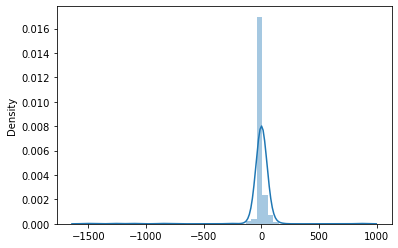

In [15]:
sns.distplot(y_test-pred_decision_tree);

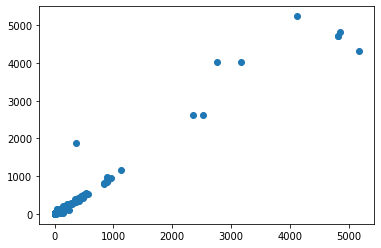

In [16]:
plt.scatter(y_test,pred_decision_tree);

In [17]:
# https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
# Hyper parameters range intialization for tuning 

parameters={"model__splitter":["best","random"],
            "model__max_depth" : [1,3,5,7,9,11,12],
           "model__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "model__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "model__max_features":["auto","log2","sqrt",None],
           "model__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

tuning_model_decision_tree = GridSearchCV(pipe_decision_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [18]:
#tuning_model_decision_tree.fit(X,y)

In [19]:
# tuning_model_decision_tree.best_params_

decision_tree_best_param = {'model__max_depth': 1,
 'model__max_features': 'auto',
 'model__max_leaf_nodes': None,
 'model__min_samples_leaf': 1,
 'model__min_weight_fraction_leaf': 0.4,
 'model__splitter': 'random'}


In [20]:
# tunning again

pipe_decision_tree_tunned = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', DecisionTreeRegressor(max_depth=1, 
                                                 max_features= "auto",
                                                 max_leaf_nodes= None,
                                                 min_samples_leaf= 1,
                                                 min_weight_fraction_leaf = 0.4,
                                                 splitter = "random"))     # Step 2
                 ])


pipe_decision_tree_tunned.fit(X_train, y_train)

pred_decision_tree_tunned = pipe_decision_tree_tunned.predict(X_test)

# Gradient Boost

In [21]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
}


pipe_gradient_boost = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', GradientBoostingRegressor(**params))     # Step 2
                 ])


pipe_gradient_boost.fit(X_train, y_train);

In [23]:
pred_gradient_boost = pipe_gradient_boost.predict(X_test)

In [24]:
# https://inria.github.io/scikit-learn-mooc/python_scripts/ensemble_hyperparameters.html

from scipy.stats import loguniform

param_distributions = {
    "model__n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "model__max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "model__learning_rate": loguniform(0.01, 1),
    "model__loss": ["squared_error", "absolute_error", "huber", "quantile"]
}

gradient_boost_search_cv = RandomizedSearchCV(
    pipe_gradient_boost, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=-1
)

In [25]:
gradient_boost_search_cv.fit(X_train, y_train);

In [26]:
columns = [f"param_{name}" for name in param_distributions.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(gradient_boost_search_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_model__n_estimators,param_model__max_leaf_nodes,param_model__learning_rate,param_model__loss,mean_test_error,std_test_error
18,200,20,0.067412,squared_error,37.408647,5.006291
12,500,5,0.05929,squared_error,38.288963,4.774351
17,500,50,0.021019,squared_error,38.382466,5.285134
16,20,50,0.185587,huber,51.176702,12.546303
6,10,5,0.906226,squared_error,53.810666,8.120171
2,500,2,0.195789,squared_error,107.709490,15.134799
15,20,50,0.042742,absolute_error,126.501327,21.339184
9,5,20,0.088553,huber,133.407075,22.601459
4,20,2,0.709894,absolute_error,134.000857,19.803359
0,10,2,0.125207,absolute_error,147.382386,21.529482


In [27]:
param_distributions = {
    "n_estimators": 200,
    "max_leaf_nodes": 20,
    "learning_rate": 0.067412,
    "loss": "squared_error"
}

pipe_gradient_boost_tunned = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', GradientBoostingRegressor(**param_distributions))     # Step 2
                 ])


pipe_gradient_boost_tunned.fit(X_train, y_train);

In [28]:
pred_gradient_boost_tunned = pipe_gradient_boost_tunned.predict(X_test);

# XGBoost

In [51]:
import xgboost as xgb

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))


def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [52]:
pipe_xgboost = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', xgb.XGBRegressor(objective="reg:squarederror", random_state=42))     # Step 2
                 ])

In [54]:
params = {
    "model__colsample_bytree": uniform(0.7, 0.3),
    "model__gamma": uniform(0, 0.5),
    "model__learning_rate": uniform(0.03, 0.3), # default 0.1 
    "model__max_depth": randint(2, 6), # default 3
    "model__n_estimators": randint(100, 150), # default 100
    "model__subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(pipe_xgboost, 
                            param_distributions=params, 
                            random_state=42, 
                            n_iter=200, 
                            cv=3, 
                            verbose=1, 
                            n_jobs=1, 
                            return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 3)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.954 (std: 0.005)
Parameters: {'model__colsample_bytree': 0.7536468127663986, 'model__gamma': 0.18323439229142996, 'model__learning_rate': 0.25325115691696864, 'model__max_depth': 4, 'model__n_estimators': 116, 'model__subsample': 0.7232243167409557}

Model with rank: 2
Mean validation score: 0.954 (std: 0.009)
Parameters: {'model__colsample_bytree': 0.7252419894985146, 'model__gamma': 0.08081435704730688, 'model__learning_rate': 0.29956625655812374, 'model__max_depth': 5, 'model__n_estimators': 134, 'model__subsample': 0.7489131066246972}

Model with rank: 3
Mean validation score: 0.952 (std: 0.006)
Parameters: {'model__colsample_bytree': 0.8874283813129753, 'model__gamma': 0.16793292857491754, 'model__learning_rate': 0.27753219942679797, 'model__max_depth': 4, 'model__n_estimators': 122, 'model__subsample': 0.6136912443282116}



In [66]:
pipe_xgboost.fit(X_train, y_train)
pred_pipe_xgboost = pipe_xgboost.predict(X_test)

In [61]:
best_params = {
    'colsample_bytree': 0.7536468127663986, 
    'gamma': 0.18323439229142996, 
    'learning_rate': 0.25325115691696864, 
    'max_depth': 4, 
    'n_estimators': 116, 
    'subsample': 0.7232243167409557}


pipe_xgboost_tunned = Pipeline([('scaler', StandardScaler()),     # Step 1
                 ('model', xgb.XGBRegressor(objective="reg:squarederror", 
                                            random_state=42,
                                            params = best_params))     # Step 2
                 ])

pipe_xgboost_tunned.fit(X_train, y_train);

In [62]:
pred_pipe_xgboost_tunned = pipe_xgboost_tunned.predict(X_test)

# Compare performance

In [70]:
show_performance(pred_linear_regression, "Linear Regression")
show_performance(pred_gaussian_regression, "Gaussian Regression")
show_performance(pred_decision_tree, "Decision Tree")
show_performance(pred_decision_tree_tunned, "Decision Tree - Tunned")
show_performance(pred_gradient_boost, "Gradient Boost")
show_performance(pred_gradient_boost_tunned, "Gradient Boost - Tunned")
show_performance(pred_pipe_xgboost, "XGBoost")
show_performance(pred_pipe_xgboost_tunned, "XGBoost - Tunned")


Performance for model: Linear Regression

R2: 0.18078792379719022
AdjR2: 0.1792708643968146
RMSE: 600.5722095023242
MSE: 360686.97882650356
---------------------------

Performance for model: Gaussian Regression

R2: 0.6547964564920182
AdjR2: 0.6541571906707072
RMSE: 389.8564122284776
MSE: 151988.02215566067
---------------------------

Performance for model: Decision Tree

R2: 0.952233056020925
AdjR2: 0.9521445987172601
RMSE: 145.0209640017608
MSE: 21031.08
---------------------------

Performance for model: Decision Tree - Tunned

R2: -0.0018433674041138381
AdjR2: -0.0036986328993067197
RMSE: 664.1512171174377
MSE: 441096.8391985739
---------------------------

Performance for model: Gradient Boost

R2: 0.9724821523073081
AdjR2: 0.9724311933300994
RMSE: 110.07134935460681
MSE: 12115.701948743901
---------------------------

Performance for model: Gradient Boost - Tunned

R2: 0.968329469405839
AdjR2: 0.968270820275109
RMSE: 118.08499863410876
MSE: 13944.066902417466
-----------------

# Making predictions

In [138]:
# RCP 45
df_rcp45 = pd.read_csv("https://github.com/rfdornelles/mds_ML_project/raw/main/data/pred_y_2022_2050_rcp45.csv")
X_rcp45 = df_rcp45[df_rcp45["country"] == "Germany"].drop(["country"],axis = 1).to_numpy()

# RCP 85
df_rcp85 = pd.read_csv("https://github.com/rfdornelles/mds_ML_project/raw/main/data/pred_y_2022_2050_rcp85.csv")
X_rcp85 = df_rcp85[df_rcp85["country"] == "Germany"].drop(["country"],axis = 1).to_numpy()

# Actual values
actual_values = df[df["country"] == "Germany"][["qnt_death_heat_cold_exposure"]].to_numpy()

In [139]:
# Merge dataset

# years
df_actual = pd.DataFrame()
df_actual["year"] = range(1991, 2020)
df_actual["actual"] = actual_values

In [69]:
import matplotlib.pyplot as plt

## Gradient Boost - Predictions

In [119]:
y_gradient_boost_rcp45 = pipe_gradient_boost.predict(X_rcp45).round()
y_gradient_boost_rcp85 = pipe_gradient_boost.predict(X_rcp85).round()

In [181]:
df_grad = pd.DataFrame()
df_grad["year"] = range(2020, 2051)
df_grad["gradient_boost_rcp45"] = y_gradient_boost_rcp45
df_grad["gradient_boost_rcp85"] = y_gradient_boost_rcp85

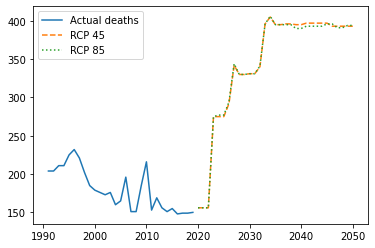

In [144]:
plt.plot(df_actual["year"], df_actual["actual"], label = "Actual deaths")
plt.plot(df_grad["year"], df_grad["gradient_boost_rcp45"], label = "RCP 45", linestyle="dashed")
plt.plot(df_grad["year"], df_grad["gradient_boost_rcp85"], label = "RCP 85", linestyle="dotted")

plt.legend()
plt.show()

## XGBoost - Predictions

In [169]:
y_xgb_rcp45 = pipe_xgboost.predict(X_rcp45).round()
y_xgb_rcp85 = pipe_xgboost.predict(X_rcp85).round()

In [167]:
df_xgboost = pd.DataFrame()
df_xgboost["year"] = range(2020, 2051)
df_xgboost["xgb_rcp45"] = y_xgb_rcp45
df_xgboost["xgb_rcp85"] = y_xgb_rcp85

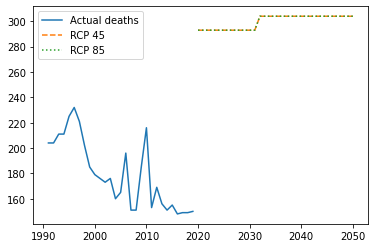

In [170]:
plt.plot(df_actual["year"], df_actual["actual"], label = "Actual deaths")
plt.plot(df_xgboost["year"], df_xgboost["xgb_rcp45"], label = "RCP 45", linestyle="dashed")
plt.plot(df_xgboost["year"], df_xgboost["xgb_rcp85"], label = "RCP 85", linestyle="dotted")

plt.legend()
plt.show()

# Table

In [183]:
df_total = pd.DataFrame()
df_total["year"] = range(1991, 2051)

df_total = df_total.merge(df_actual, on = "year", how = "left")
df_total = df_total.merge(df_xgboost, on = "year", how = "left")
df_total = df_total.merge(df_grad, on = "year", how = "left")

df_total

,year,actual,xgb_rcp45,xgb_rcp85,gradient_boost_rcp45,gradient_boost_rcp85
0,1991,204.0,NaN,NaN,NaN,NaN
1,1992,204.0,NaN,NaN,NaN,NaN
2,1993,211.0,NaN,NaN,NaN,NaN
3,1994,211.0,NaN,NaN,NaN,NaN
4,1995,225.0,NaN,NaN,NaN,NaN
5,1996,232.0,NaN,NaN,NaN,NaN
6,1997,221.0,NaN,NaN,NaN,NaN
7,1998,202.0,NaN,NaN,NaN,NaN
8,1999,185.0,NaN,NaN,NaN,NaN
9,2000,179.0,NaN,NaN,NaN,NaN
